# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
#import the CSV
df=pd.read_csv('ab_data.csv')
# checing rge df randome samples
df.sample(10)

,user_id,timestamp,group,landing_page,converted
50890,825603,2017-01-12 00:31:37.838782,treatment,new_page,0
128856,735184,2017-01-10 08:20:46.435256,treatment,new_page,0
120951,858325,2017-01-06 22:37:47.286316,control,old_page,0
23554,806446,2017-01-21 04:57:41.170630,control,old_page,0
243211,675397,2017-01-14 12:54:34.348642,treatment,new_page,0
175265,697635,2017-01-17 18:20:57.627784,treatment,new_page,0
192580,771704,2017-01-15 15:59:30.391929,treatment,new_page,0
253963,758622,2017-01-19 03:04:53.858211,treatment,new_page,0
257798,842850,2017-01-12 00:20:06.710690,control,old_page,0
77794,651281,2017-01-12 11:36:15.584484,treatment,new_page,0


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# number of the raws
f"number of raws = {df.shape[0]}"

'number of raws = 294478'

**c.** The number of unique users in the dataset.

In [4]:
# checking the unmber of the unique values
n_users=df['user_id'].nunique()
f"number of unique users is{n_users}"

'number of unique users is290584'

**d.** The proportion of users converted.

In [5]:
# the persentage of the converted 
converted_p = (df['converted']==1).mean()
f"converted % = {converted_p}"

'converted % = 0.11965919355605512'

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# adding all the psopibale outcomes that the treatment dones not match new page
miss_match = ((df.query('group == "treatment" & landing_page != "new_page"')).shape[0])
f"miss matching treatment with page landing = {miss_match}"


'miss matching treatment with page landing = 1965'

**f.** Do any of the rows have missing values?

In [7]:
# there are not any nulls in our data 
print("null values per colunms below")
df.isnull().sum()

null values per colunms below


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2=df.query('group == 	"control" & landing_page == "old_page" \
             or group == "treatment" & landing_page == "new_page"')

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
#number if the unique values
unique_id =df2['user_id'].nunique()
f"number of unique user {unique_id}"

'number of unique user 290584'

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#finding the duplicated id
print('duplicated ID')
df2.user_id[df2.user_id.duplicated(False)]

duplicated ID


1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
#delplay  the data for both
df2.loc[df2.user_id.duplicated(False),:]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
# removing duplicated raw with condtion using subsent
df2.drop_duplicates(subset ="user_id",keep = 'first', inplace = True)
# Check again if the row with a duplicate user_id is deleted or not
print('no duplicated found')
df2.user_id[df2.user_id.duplicated(False)]


no duplicated found


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Series([], Name: user_id, dtype: int64)

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [14]:
 # since converted colmun pool values mean will work without condtions
converted  =(df2['converted']).mean()
f"probability of an individual converted = {converted}"

'probability of an individual converted = 0.11959708724499628'

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# controled converted
control_conv=len(df2.query('group == "control" & converted == 1'))/ len(df2.query('group == "control" '))
f"controled and converted = {control_conv}"

'controled and converted = 0.1203863045004612'

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_conv =len(df2.query('group == "treatment" & converted == 1'))/ len(df2.query('group == "treatment" '))

f"treatment and converted ={treatment_conv}"

'treatment and converted =0.11880806551510564'

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.

obs_diff =treatment_conv - control_conv 

f"between the conversion rates for the two groups {obs_diff}"

'between the conversion rates for the two groups -0.0015782389853555567'

**d.** What is the probability that an individual received the new page?

In [18]:
r_newpage = len(df2.query('landing_page== "new_page"'))/len(df2)
f"users recived new page % {r_newpage}"

'users recived new page % 0.5000619442226688'

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.


>- **regading to The  "converted" success rate seem that the treatment  group did not show  better result that than control group as the differnet**  
>- **even though the landing in the new page is quite have the same chance as the old page and  the new page is lower conversion rate than the new page with approcimate -0.001578'**
>- **treatment group users did not lead to more conversions**

>-  **conclusion p-Value is bigger than alfa 'the significant threshold' , we failed to reject the null hypothesis**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**$H_0 = p_{new} - p_{old}<=0 $**
 
>**$H_1=  p_{new} - p_{old}>0 $**


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new = converted

f"conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = {p_new}"

'conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = 0.11959708724499628'

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old = converted

f"conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = {p_old}"

'conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis = 0.11959708724499628'

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
n_new = len(df2.query('group == "treatment"'))


f"The number treatment group users are shown the new page = {n_new}"

'The number treatment group users are shown the new page = 145310'

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = len(df2.query('group == "control"'))

f"The number of control group users are shown the old page.{n_old}"

'The number of control group users are shown the old page.145274'

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1], p=[(1-p_new),p_new], size=[1,n_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group

old_page_converted = np.random.choice([0,1], p=[(1-p_new),p_new], size=[1,n_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
diff_n_o = new_page_converted.mean() - old_page_converted.mean()
f"difference in the converted probability ={diff_n_o}"

'difference in the converted probability =0.00017665208544950795'


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []
for i in range (0,10000):
    new_page_converted = np.random.choice([0,1], p=[(1-p_new),p_new], size=[1,n_new])
    old_page_converted = np.random.choice([0,1], p=[(1-p_new),p_new], size=[1,n_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



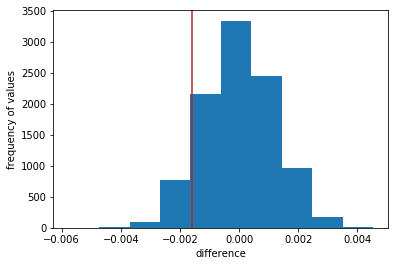

In [27]:

plt.hist(p_diffs)
plt.xlabel('difference')
plt.ylabel('frequency of values')
plt.axvline(obs_diff,color='brown');


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
#calculate p-value 
p_value = (np.array(p_diffs) > obs_diff).mean()
f"P-Value = {p_value}"

'P-Value = 0.9035'

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

In [29]:
# checking if P-value is smaller than or equal to the Type I error rate
alfa =0.005
f"testing P-Value is smaller than alfa the result is {p_value <= alfa}"

'testing P-Value is smaller than alfa the result is False'

>**-the scientific name for the generated value is P-Value which is the probability of observing the statistic in favor of the alternative) giving the null hypothesis is true.**

>**- P-Value clearly signify that the condiftional propapilty of the data givin (p_diffs) that the null hypothesis is ture**





**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [30]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

# number of conversions with the new_page
convert_new =len(df2.query('landing_page == "new_page" & converted == 1'))
# number of individuals who were shown the old_page
n_old =len(df2.query('landing_page == "old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page == "new_page"'))


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---



In [31]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative='smaller')
f"Z-Score ={z_score} & P-Value ={p_value}"

'Z-Score =1.3109241984234394 & P-Value =0.9050583127590245'

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


>**Z-Score =1.310 which cumulative probability and percentile in z-score table is 90%
 and P-value 0.905 which is to close to p value calculated before that support the privious findings in parts j and k.**


<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**to predict 2 possible outcomes will use Logistic regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [32]:
# creating the intercept & the dummies
df2['intercept']=1
df2[['no_ab_page','ab_page']] = pd.get_dummies(df2['group'])
df2=df2.drop(['no_ab_page'],axis=1)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [33]:
#using the logit method & fitting the model
log_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [34]:
#import scipy to prvent .summary() error referance to https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:               8.077e-06
Time:                        22:44:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  



>1- **P-value associated with a_page = 0.190 which i higher that Alfa type 1 error rate.**


>**2- P-value is different from P-value in Part II becouse its based in dfferent model that conisder the below hypothesis**

>**$H_0 : b1 =0 $**
 
>**$H_1 : b1 ≠ 0 $**

>**- hypothesis from Part II as below.**

>**$H_0 = p_{new} - p_{old}<=0 $**
 
>**$H_1=  p_{new} - p_{old}>0 $**


>**also hypothesis (Part II is one-sided while  Part III is two-sided).**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### there is some factors to cosider that may influence the converting rate as  such as below.

>**(Change Aversion , Novelty Effect , metric choice,Long enough run time for the experiment,The practical significance of a conversion rate,Consistency among test subjects in the control and treatment group).**

>**considering all or some of the above will mae the it more complex**


**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [36]:
# Read the countries.csv
df=pd.read_csv('countries.csv')
df.sample(10)


,user_id,country
52187,705114,US
86991,710766,UK
107489,811848,US
150472,700744,CA
148132,701984,UK
65688,767542,US
113497,780196,US
267130,887363,UK
271982,699462,US
174590,834726,UK


In [37]:
# Join with the df2 dataframe
df_merged=pd.merge(df2,df)

In [38]:
#checking the unique values in countries colunm
df_merged['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [39]:
# Create the necessary dummy variables sorted alphabetic
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])
df_merged.sample(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
32312,863937,2017-01-09 12:10:52.423808,control,old_page,0,1,0,UK,0,1,0
198643,822725,2017-01-23 05:57:09.286028,control,old_page,0,1,0,US,0,0,1
156158,857856,2017-01-24 04:00:10.240082,treatment,new_page,0,1,1,UK,0,1,0
129421,922696,2017-01-02 13:42:05.378582,treatment,new_page,0,1,1,US,0,0,1
128126,781042,2017-01-07 13:51:29.758571,treatment,new_page,0,1,1,US,0,0,1


In [40]:
# Fit your model with dropping CA, and summarize the results
# already we have the intercpit column from the last fittig
log_mod2 = sm.Logit(df_merged['converted'],df_merged[['intercept','UK','US']])
result=log_mod2.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:               1.521e-05
Time:                        22:44:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [41]:
#to exponentiate
f" US useres are {np.exp(0.0408)} convert times as likely as CA useres holding all other variables constant and UK useres {np.exp(0.0507)} convert times as likely as CA useres holding all other variables constant"

' US useres are 1.0416437559600236 convert times as likely as CA useres holding all other variables constant and UK useres 1.052007243765014 convert times as likely as CA useres holding all other variables constant'

>**US useres are 1.0416437559600236 convert times as likely as CA useres holding all other variables constant**

>**UK useres 1.052007243765014 convert times as likely as CA useres holding all other variables constant'**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 



In [42]:
#adding higher order and lower order terms
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_US'] = df_merged['ab_page'] * df_merged['US']

In [43]:
logit_mod = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page','UK','US','ab_UK', 'ab_US']])
result = logit_mod.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:               3.482e-05
Time:                        22:44:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

>**p-Value for the varables above is bigger than alfa which is insignificanct means new page did not have higher convert rate**

###  overall conclusion 
>-  regading to the outputs for Part I , II & III , we failed to reject the null hypothesis **

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0